In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import string

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/nlp_tweet_train.csv')

In [0]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [0]:
data.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [0]:
data.isnull().mean()*100

id           0.000000
keyword      0.801261
location    33.272035
text         0.000000
target       0.000000
dtype: float64

## Pre-processing & EDA

In [0]:
data['text_count'] = data['text'].apply(len)

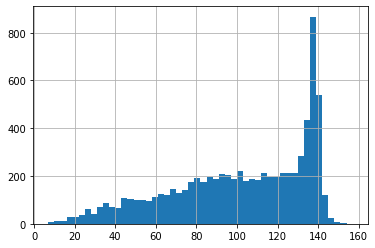

In [0]:
data['text_count'].hist(bins=50)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e4aad4048>,
      dtype=object)

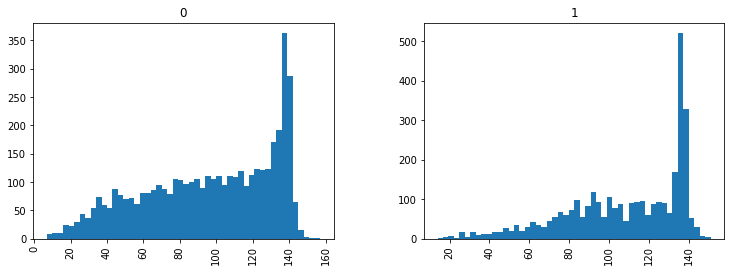

In [0]:
data.hist(column='text_count', by='target', bins=50,figsize=(12,4))

In [0]:
data['keyword'].nunique()

221

# Model 1: Using stopwords

In [0]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [0]:
# convert tokenize text to vectors
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
# Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

In [0]:
# create a pipeline
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer = text_process)),  # strings to token integer counts
    ('classifier', MultinomialNB()),  # train using Naive Bayes classifier
])

In [0]:
from sklearn.model_selection import train_test_split

txt_train, txt_test, label_train, label_test = train_test_split(data['text'], data['target'], test_size=0.2)

In [0]:
pipeline.fit(txt_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f3e4a4d28c8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [0]:
predictions = pipeline.predict(txt_test)

In [0]:
# evaluation
from sklearn.metrics import classification_report

print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       955
           1       0.70      0.79      0.74       568

    accuracy                           0.80      1523
   macro avg       0.78      0.80      0.79      1523
weighted avg       0.80      0.80      0.80      1523



# Model 2: Using TF-IDF

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer

In [0]:
pipeline2 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', MultinomialNB()), 
])

In [0]:
pipeline2.fit(txt_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fa3f27e06a8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [0]:
predictions = pipeline2.predict(txt_test)

In [0]:
# evaluation
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1046
           1       0.62      0.84      0.71       477

    accuracy                           0.79      1523
   macro avg       0.77      0.80      0.77      1523
weighted avg       0.82      0.79      0.80      1523



# Model 3: Using Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
pipeline3 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  
    ('classifier', RandomForestClassifier(n_estimators=600)), 
])

In [0]:
pipeline3.fit(txt_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fa3f27e06a8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.

In [0]:
predictions = pipeline3.predict(txt_test)

In [0]:
# evaluation
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1050
           1       0.61      0.83      0.70       473

    accuracy                           0.78      1523
   macro avg       0.76      0.79      0.76      1523
weighted avg       0.81      0.78      0.79      1523



# Model 4: Using Random Forest with TF-IDF

In [0]:
pipeline4 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()), 
    ('classifier', RandomForestClassifier(n_estimators=600)), 
])

In [0]:
pipeline4.fit(txt_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fa3f27e06a8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.

In [0]:
predictions = pipeline4.predict(txt_test)

In [0]:
# evaluation
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1006
           1       0.64      0.79      0.71       517

    accuracy                           0.78      1523
   macro avg       0.76      0.78      0.76      1523
weighted avg       0.80      0.78      0.78      1523

